<a href="https://colab.research.google.com/github/MikeyBoo/pyNbody-Notebook/blob/main/My_pyNbody_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
!mv ./drive/MyDrive/testdata ./


mv: cannot stat './drive/MyDrive/testdata': No such file or directory


In [17]:
!ls

drive  sample_data  testdata


In [18]:
pip install pynbody

In [19]:
import pynbody

In [20]:
import pylab

In [21]:
s = pynbody.load('testdata/g15784.lr.01024.gz')

In [22]:
h = s.halos()

In [23]:
h1 = h[1]

In [24]:
print('ngas = %e, ndark = %e, nstar = %e\n'%(len(h1.gas),len(h1.dark),len(h1.star)))

ngas = 7.906000e+04, ndark = 1.610620e+05, nstar = 2.621780e+05



In [25]:
pynbody.analysis.halo.center(h1,mode='hyb')

In [26]:
print(h[1]['pos'][0])

[-0.00091396 -0.00044043 -0.00365958]


In [27]:
print(h[5]['pos'][0])

[-0.00092652  0.00130131 -0.00042332]


In [28]:
h5 = h[5]

In [29]:
my_h5_transform = pynbody.analysis.halo.center(h5, mode='hyb', move_all=False)

In [30]:
print(h[1]['pos'][0]) # should be unchanged

[-0.00091396 -0.00044043 -0.00365958]


In [31]:
print(h5['pos'][0]) # should be changed

[7.37221446e-05 8.42725399e-05 1.28729490e-04]


In [32]:
my_h5_transform.revert()

In [33]:
print(h5['pos'][0]) # back to where it started

[-0.00092652  0.00130131 -0.00042332]


In [34]:
print(h[1]['pos'][0]) # still hasn't changed, of course

[-0.00091396 -0.00044043 -0.00365958]


In [35]:
with pynbody.analysis.halo.center(h[5], mode='hyb'): print(h[5]['pos'][0])

[7.37221446e-05 8.42725399e-05 1.28729490e-04]


In [36]:
print(h[5]['pos'][0])

[-0.00092652  0.00130131 -0.00042332]


In [37]:
s = pynbody.load('testdata/g15784.lr.01024.gz'); h1 = s.halos()[1];

In [38]:
cen_hyb = pynbody.analysis.halo.center(h1,mode='hyb',retcen=True)

In [39]:
cen_pot = pynbody.analysis.halo.center(h1,mode='pot',retcen=True)

In [40]:
print(cen_hyb)

[ 0.02445621 -0.03411364 -0.12243623]


In [41]:
print(cen_pot)

[ 0.02445719 -0.03411397 -0.12243643]


In [42]:
s['pos'] -= cen_hyb

In [43]:
s.physical_units()

SimArray([[10263.511, 10323.97 , 10384.43 , ..., 10334.826, 10254.129,
           10173.432],
          [10342.602, 10403.281, 10463.959, ..., 10356.803, 10276.174,
           10195.545],
          [10421.694, 10482.592, 10543.489, ..., 10378.778, 10298.219,
           10217.658],
          ...,
          [ 9527.131,  9636.182,  9745.233, ...,  9798.587,  9780.066,
            9761.545],
          [ 9500.557,  9605.702,  9710.848, ...,  9792.068,  9774.049,
            9756.029],
          [ 9473.983,  9575.222,  9676.462, ...,  9785.549,  9768.031,
            9750.514]], dtype=float32, 'Msol kpc**-3')

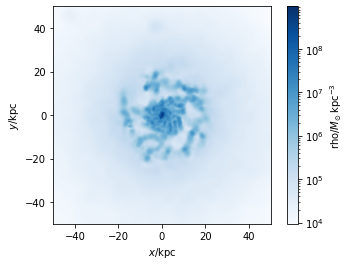

In [44]:
pynbody.plot.image(h1.g, width=100, cmap='Blues')

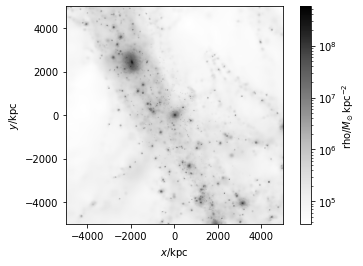

In [45]:
pynbody.plot.image(s.d[pynbody.filt.Sphere('10 Mpc')], width='10 Mpc', units = 'Msol kpc^-2', cmap='Greys');

In [46]:
pynbody.analysis.angmom.sideon(h1, cen=(0,0,0))

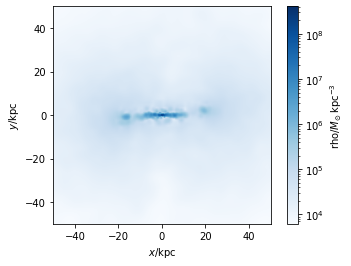

In [47]:
pynbody.plot.image(h1.g, width=100, cmap='Blues');

In [48]:
s.rotate_x(90)

/usr/local/lib/python3.7/dist-packages/pynbody/array.py:865: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.base[self._reexpress_index(item)]


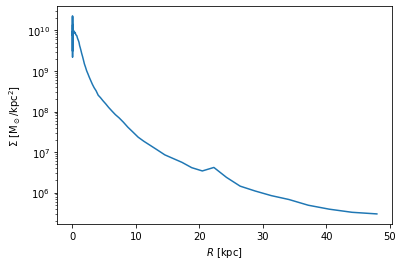

In [49]:
ps = pynbody.analysis.profile.Profile(h1.s, min = 0.01, max = 50, type = 'log')
pylab.clf()
pylab.plot(ps['rbins'], ps['density']);
pylab.semilogy();
pylab.xlabel('$R$ [kpc]');
pylab.ylabel('$\Sigma$ [M$_\odot$/kpc$^2$]');

/usr/local/lib/python3.7/dist-packages/pynbody/array.py:865: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.base[self._reexpress_index(item)]
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


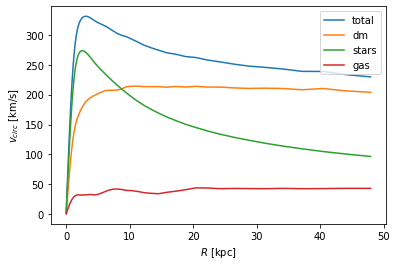

In [50]:
pylab.figure()
pd = pynbody.analysis.profile.Profile(h1.d,min=.01,max=50, type = 'log')
pg = pynbody.analysis.profile.Profile(h1.g,min=.01,max=50, type = 'log')
p = pynbody.analysis.profile.Profile(h1,min=.01,max=50, type = 'log')
for prof, name in zip([p,pd,ps,pg],['total','dm','stars','gas']) : pylab.plot(prof['rbins'],prof['v_circ'],label=name)
pylab.xlabel('$R$ [kpc]');
pylab.ylabel('$v_{circ}$ [km/s]');
pylab.legend()